In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error

In [3]:
# TODO: enter your ETF ticker, dates, and price interval
# set parameters for data pull
ticker = 'SPY'
start_date = '2010-01-01'
end_date = '2023-12-31'
interval = '1d'

# access data and display
df_etf = yf.download(ticker, start = start_date, end = end_date, interval= interval)

df_etf_backup = df_etf.copy(deep=True)

df_etf.drop(columns=['Open','High','Low','Close','Volume'], inplace=True)

print(df_etf)

[*********************100%%**********************]  1 of 1 completed

             Adj Close
Date                  
2010-01-04   86.860054
2010-01-05   87.089966
2010-01-06   87.151321
2010-01-07   87.519196
2010-01-08   87.810448
...                ...
2023-12-22  472.182892
2023-12-26  474.176697
2023-12-27  475.034058
2023-12-28  475.213501
2023-12-29  473.837769

[3522 rows x 1 columns]


In [4]:
# Gabe

g_df_etf = df_etf.copy(deep = True)
g_df_etf['Today\'s Returns'] = (g_df_etf['Adj Close']/g_df_etf['Adj Close'].shift() - 1)
g_df_etf['Yesterday\'s Returns'] = (g_df_etf['Today\'s Returns'].shift(1))
g_df_etf['Two Days Ago Returns'] = (g_df_etf['Today\'s Returns'].shift(2))
g_df_etf['Last Week\'s Returns'] = (g_df_etf['Adj Close']/g_df_etf['Adj Close'].shift(7) - 1)
g_df_etf['Last Month\'s Returns'] = (g_df_etf['Adj Close']/g_df_etf['Adj Close'].shift(30) - 1)
g_df_etf = g_df_etf.rename(columns={'Adj Close': 'Spot Price'})

g_df_etf

,Spot Price,Today's Returns,Yesterday's Returns,Two Days Ago Returns,Last Week's Returns,Last Month's Returns
Date,,,,,,
2010-01-04,86.860054,NaN,NaN,NaN,NaN,NaN
2010-01-05,87.089966,0.002647,NaN,NaN,NaN,NaN
2010-01-06,87.151321,0.000705,0.002647,NaN,NaN,NaN
2010-01-07,87.519196,0.004221,0.000705,0.002647,NaN,NaN
2010-01-08,87.810448,0.003328,0.004221,0.000705,NaN,NaN
...,...,...,...,...,...,...
2023-12-22,472.182892,0.002010,0.009482,-0.013857,0.010777,0.096188
2023-12-26,474.176697,0.004223,0.002010,0.009482,0.011797,0.083903
2023-12-27,475.034058,0.001808,0.004223,0.002010,0.015298,0.086899


In [5]:
n_df_etf = df_etf_backup.copy(deep = True)
n_df_etf.drop(columns=['Open','Close','Volume'], inplace=True)

n_df_etf['Today\'s Returns'] = (n_df_etf['Adj Close']/n_df_etf['Adj Close'].shift() - 1)
n_df_etf['Yesterday\'s Returns'] = (n_df_etf['Today\'s Returns'].shift(1))
n_df_etf['Two Days Ago Returns'] = (n_df_etf['Today\'s Returns'].shift(2))
n_df_etf['Three Days Ago Returns'] = (n_df_etf['Today\'s Returns'].shift(3))
n_df_etf['Four Days Ago Returns'] = (n_df_etf['Today\'s Returns'].shift(4))
n_df_etf['Five Days Ago Returns'] = (n_df_etf['Today\'s Returns'].shift(5))
n_df_etf['Last Week\'s Returns'] = (n_df_etf['Adj Close']/n_df_etf['Adj Close'].shift(7) - 1)
n_df_etf['Two Week\'s Returns'] = (n_df_etf['Last Week\'s Returns'].shift(7))
n_df_etf['Last Month\'s Returns'] = (n_df_etf['Adj Close']/n_df_etf['Adj Close'].shift(30) - 1)
n_df_etf['Two Month\'s Returns'] = (n_df_etf['Last Month\'s Returns'].shift(30))
n_df_etf['Quarter\'s Returns'] = (n_df_etf['Adj Close']/n_df_etf['Adj Close'].shift(90) - 1)

n_df_etf = n_df_etf.rename(columns={'Adj Close': 'Spot Price'})

scaler = MinMaxScaler()

n_df_etf['Spot Price'] = scaler.fit_transform(n_df_etf[['Spot Price']])
# n_df_etf['Today\'s Returns'] = scaler.fit_transform(n_df_etf[['Today\'s Returns']])
n_df_etf['High'] = scaler.fit_transform(n_df_etf[['High']])
n_df_etf['Low'] = scaler.fit_transform(n_df_etf[['Low']])

n_df_etf['Yesterday\'s High'] = (n_df_etf['High'].shift(1))
n_df_etf['Two Days Ago High'] = (n_df_etf['High'].shift(2))
n_df_etf['Three Days Ago High'] = (n_df_etf['High'].shift(3))
n_df_etf['Four Days Ago High'] = (n_df_etf['High'].shift(4))
n_df_etf['Five Days Ago High'] = (n_df_etf['High'].shift(5))
n_df_etf['Last Week\'s High'] = n_df_etf['High'].rolling(window=7).max()
n_df_etf['Two Week\'s High'] = n_df_etf['High'].rolling(window=14).max()
n_df_etf['Last Month\'s High'] = n_df_etf['High'].rolling(window=30).max()
n_df_etf['Two Month\'s High'] = n_df_etf['High'].rolling(window=60).max()
n_df_etf['Quarter\'s High'] = n_df_etf['High'].rolling(window=90).max()

n_df_etf['Yesterday\'s Low'] = (n_df_etf['Low'].shift(1))
n_df_etf['Two Days Ago Low'] = (n_df_etf['Low'].shift(2))
n_df_etf['Three Days Ago Low'] = (n_df_etf['Low'].shift(3))
n_df_etf['Four Days Ago Low'] = (n_df_etf['Low'].shift(4))
n_df_etf['Five Days Ago Low'] = (n_df_etf['Low'].shift(5))
n_df_etf['Last Week\'s Low'] = n_df_etf['Low'].rolling(window=7).min()
n_df_etf['Two Week\'s Low'] = n_df_etf['Low'].rolling(window=14).min()
n_df_etf['Last Month\'s Low'] = n_df_etf['Low'].rolling(window=30).min()
n_df_etf['Two Month\'s Low'] = n_df_etf['Low'].rolling(window=60).min()
n_df_etf['Quarter\'s Low'] = n_df_etf['Low'].rolling(window=90).min()

n_df_etf = n_df_etf.dropna()

n_df_etf

,High,Low,Spot Price,Today's Returns,Yesterday's Returns,Two Days Ago Returns,Three Days Ago Returns,Four Days Ago Returns,Five Days Ago Returns,Last Week's Returns,...,Yesterday's Low,Two Days Ago Low,Three Days Ago Low,Four Days Ago Low,Five Days Ago Low,Last Week's Low,Two Week's Low,Last Month's Low,Two Month's Low,Quarter's Low
Date,,,,,,,,,,,,,,,,,,,,,
2010-05-13,0.037869,0.039346,0.025843,-0.012431,0.013986,-0.002841,0.044041,-0.014875,-0.033214,-0.013019,...,0.039880,0.036734,0.036734,0.022072,0.010316,0.010316,0.010316,0.010316,0.010316,0.009197
2010-05-14,0.031628,0.031296,0.021763,-0.018105,-0.012431,0.013986,-0.002841,0.044041,-0.014875,-0.025082,...,0.039346,0.039880,0.036734,0.036734,0.022072,0.010316,0.010316,0.010316,0.010316,0.009197
2010-05-17,0.029477,0.028363,0.021880,0.000527,-0.018105,-0.012431,0.013986,-0.002841,0.044041,0.008943,...,0.031296,0.039346,0.039880,0.036734,0.036734,0.022072,0.010316,0.010316,0.010316,0.009197
2010-05-18,0.031336,0.029057,0.018869,-0.013603,0.000527,-0.018105,-0.012431,0.013986,-0.002841,0.010246,...,0.028363,0.031296,0.039346,0.039880,0.036734,0.028363,0.010316,0.010316,0.010316,0.009197
2010-05-19,0.024830,0.024605,0.017626,-0.005694,-0.013603,0.000527,-0.018105,-0.012431,0.013986,-0.037879,...,0.029057,0.028363,0.031296,0.039346,0.039880,0.024605,0.010316,0.010316,0.010316,0.009197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,0.987784,0.987844,0.992351,0.002010,0.009482,-0.013857,0.006081,0.005625,-0.001647,0.010777,...,0.980220,0.977501,0.989844,0.983019,0.976461,0.976461,0.941487,0.886892,0.821262,0.821262
2023-12-26,0.990971,0.993949,0.997383,0.004223,0.002010,0.009482,-0.013857,0.006081,0.005625,0.011797,...,0.987844,0.980220,0.977501,0.989844,0.983019,0.976461,0.941487,0.899128,0.821262,0.821262
2023-12-27,0.991183,0.996348,0.999547,0.001808,0.004223,0.002010,0.009482,-0.013857,0.006081,0.015298,...,0.993949,0.987844,0.980220,0.977501,0.989844,0.977501,0.946765,0.919575,0.821262,0.821262


In [6]:
n_df_etf['Today\'s Returns'] = [1 if x > 0 else 0 for x in n_df_etf['Today\'s Returns']]
n_df_etf["Today's Returns"]

Date
2010-05-13    0
2010-05-14    0
2010-05-17    1
2010-05-18    0
2010-05-19    0
             ..
2023-12-22    1
2023-12-26    1
2023-12-27    1
2023-12-28    1
2023-12-29    0
Name: Today's Returns, Length: 3432, dtype: int64

In [7]:
y = n_df_etf[["Today's Returns"]]
X = n_df_etf.drop(["Today's Returns", "Low", "High"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=None)

In [8]:
y.describe()

,Today's Returns
count,3432.000000
mean,0.548077
std,0.497756
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [9]:
y

,Today's Returns
Date,
2010-05-13,0
2010-05-14,0
2010-05-17,1
2010-05-18,0
2010-05-19,0
...,...
2023-12-22,1
2023-12-26,1
2023-12-27,1


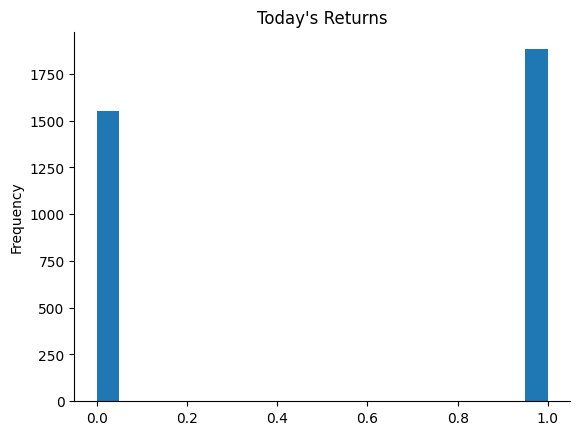

In [10]:
from matplotlib import pyplot as plt
y["Today's Returns"].plot(kind='hist', bins=20, title="Today's Returns")
plt.gca().spines[['top', 'right',]].set_visible(False)

In [12]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',
}

evals = [(dtrain, 'train'), (dtest, 'test')]

bst = xgb.train(params, dtrain, num_boost_round=1000, evals=evals, early_stopping_rounds=50)

print("Best iteration:", bst.best_iteration)

# Make predictions on the test set
y_pred_proba = bst.predict(dtest)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_proba]

# mae = mean_absolute_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
# print(f"MAE: {mae}")


[0]	train-logloss:0.68295	test-logloss:0.67761
[1]	train-logloss:0.67680	test-logloss:0.67275
[2]	train-logloss:0.67114	test-logloss:0.66812
[3]	train-logloss:0.66928	test-logloss:0.66812
[4]	train-logloss:0.66371	test-logloss:0.66353


[5]	train-logloss:0.65786	test-logloss:0.65999
[6]	train-logloss:0.65574	test-logloss:0.65950
[7]	train-logloss:0.65111	test-logloss:0.65521
[8]	train-logloss:0.64613	test-logloss:0.65200
[9]	train-logloss:0.64433	test-logloss:0.65022
[10]	train-logloss:0.64225	test-logloss:0.64875
[11]	train-logloss:0.63775	test-logloss:0.64560
[12]	train-logloss:0.63566	test-logloss:0.64454
[13]	train-logloss:0.63166	test-logloss:0.64112
[14]	train-logloss:0.62789	test-logloss:0.63926
[15]	train-logloss:0.62583	test-logloss:0.63855
[16]	train-logloss:0.62199	test-logloss:0.63670
[17]	train-logloss:0.61824	test-logloss:0.63479
[18]	train-logloss:0.61524	test-logloss:0.63200


c:\code\school\cs270\cs270-labs\.venv\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:47:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[19]	train-logloss:0.61156	test-logloss:0.63044
[20]	train-logloss:0.60912	test-logloss:0.62871
[21]	train-logloss:0.60782	test-logloss:0.62824
[22]	train-logloss:0.60476	test-logloss:0.62566
[23]	train-logloss:0.60279	test-logloss:0.62525
[24]	train-logloss:0.60113	test-logloss:0.62458
[25]	train-logloss:0.59817	test-logloss:0.62188
[26]	train-logloss:0.59675	test-logloss:0.62129
[27]	train-logloss:0.59368	test-logloss:0.62001
[28]	train-logloss:0.59223	test-logloss:0.61963
[29]	train-logloss:0.58936	test-logloss:0.61814
[30]	train-logloss:0.58651	test-logloss:0.61737
[31]	train-logloss:0.58385	test-logloss:0.61621
[32]	train-logloss:0.58143	test-logloss:0.61468
[33]	train-logloss:0.57891	test-logloss:0.61270
[34]	train-logloss:0.57665	test-logloss:0.61046
[35]	train-logloss:0.57433	test-logloss:0.60956
[36]	train-logloss:0.57236	test-logloss:0.60860
[37]	train-logloss:0.57049	test-logloss:0.60842
[38]	train-logloss:0.56882	test-logloss:0.60727
[39]	train-logloss:0.56729	test-logloss:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost.sklearn import XGBRegressor

xgb_model = XGBRegressor()
params = {
    'max_depth': [4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'n_estimators': [100, 500, 1000],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2]
}

random_search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=70, scoring='neg_root_mean_squared_error', cv=5, verbose=1)
random_search.fit(X_train, y_train)

# Print best parameters and lowest MAE
print("Best Parameters:", random_search.best_params_)
print("Lowest RMSE:", abs(random_search.best_score_))


Fitting 5 folds for each of 70 candidates, totalling 350 fits
Best Parameters: {'subsample': 0.8, 'reg_lambda': 1.5, 'reg_alpha': 0, 'n_estimators': 1000, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
Lowest RMSE: 0.009020701192958626


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 0.8, 'reg_lambda': 1.5, 'reg_alpha': 0, 'n_estimators': 1000, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
Lowest MAE: 0.0055560139398628415

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 0.8, 'reg_lambda': 1.5, 'reg_alpha': 0, 'n_estimators': 1000, 'max_depth': 4, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Lowest MAE: 0.005522493754183544

Fitting 5 folds for each of 70 candidates, totalling 350 fits
Best Parameters: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 1000, 'max_depth': 4, 'learning_rate': 0.05, 'colsample_bytree': 0.7}
Lowest RMSE: 0.008969042501437926

Improvement Ideas
* Get a good benchmark number
* More features
  * Function to add $n$ days to the feature set (maybe logarithmic/fibbinacci sequence)
  * Fix fed interest rate
  * Add month (as number, could also try as one-hot encoded)
  * Try different stock indicators (SMA, MACD, OBV, etc)
* Try different models
  * Gabe tried MLP, KNN
  * Nathan tried fancy MLP (tensorflow)
  * maybe try pytorch?
  * Andrew tried Decision trees and Logistic Regression
  * Later we can try ensamble methods
  * Deep learning?
* Try different hyperparameters
